In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
from os import listdir
train_data_li = listdir('./train/')
train_data_li

['train_activity.csv',
 'train_combat.csv',
 'train_label.csv',
 'train_payment.csv',
 'train_pledge.csv',
 'train_trade.csv']

In [3]:
import sys
mod = sys.modules[__name__]
for name in train_data_li:
    setattr(mod, name.split('.')[0], pd.read_csv('./train/' + name))

In [4]:
train_activity.shape, train_combat.shape, train_pledge.shape, train_trade.shape, train_payment.shape, train_label.shape

((1601834, 17),
 (1574671, 13),
 (1083384, 15),
 (1849325, 11),
 (66432, 3),
 (40000, 3))

# BaseLine

In [5]:
train_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601834 entries, 0 to 1601833
Data columns (total 17 columns):
day                  1601834 non-null int64
acc_id               1601834 non-null int64
char_id              1601834 non-null int64
server               1601834 non-null object
playtime             1601834 non-null float64
npc_kill             1601834 non-null float64
solo_exp             1601834 non-null float64
party_exp            1601834 non-null float64
quest_exp            1601834 non-null float64
rich_monster         1601834 non-null int64
death                1601834 non-null float64
revive               1601834 non-null float64
exp_recovery         1601834 non-null float64
fishing              1601834 non-null float64
private_shop         1601834 non-null float64
game_money_change    1601834 non-null float64
enchant_count        1601834 non-null float64
dtypes: float64(12), int64(4), object(1)
memory usage: 207.8+ MB


In [6]:
df = train_activity[[col for col in train_activity.columns if col != 'server']].groupby(['day', 'acc_id']).mean().reset_index()
df.head()

,day,acc_id,char_id,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,2,233598.000000,2.703457,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.462447,1.024810,0.0
1,1,8,190373.142857,0.066207,0.442026,1.229164,0.000000,0.053589,0.0,0.0,0.0,0.0,0.0,0.000000,0.104655,0.0
2,1,17,135044.000000,0.327692,0.180798,0.006721,0.010488,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,-0.005380,0.0
3,1,20,149667.000000,0.285560,3.840013,0.028034,0.000000,0.000434,0.0,0.0,0.0,0.0,0.0,0.000000,-0.041201,0.0
4,1,31,244707.500000,0.859020,0.855157,0.003274,0.003449,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.009011,0.0


In [7]:
df.shape

(949358, 16)

In [8]:
df_grouped = df.groupby('day')
p = df_grouped.get_group(1)
for i in range(2, 29):
    p = pd.merge(p, df_grouped.get_group(i), on='acc_id', how='outer',
                 suffixes=('_'+str(i-1), '_'+str(i)))

In [9]:
p = p[[col for col in p.columns if ('day' not in col) & ('char' not in col)]]
p.head()

,acc_id,playtime_1,npc_kill_1,solo_exp_1,party_exp_1,quest_exp_1,rich_monster_1,death_1,revive_1,exp_recovery_1,...,party_exp_28,quest_exp_28,rich_monster_28,death_28,revive_28,exp_recovery_28,fishing_28,private_shop_28,game_money_change_28,enchant_count_28
0,2,2.703457,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,3.134176,-0.016633,0.0
1,8,0.066207,0.442026,1.229164,0.000000,0.053589,0.0,0.0,0.0,0.0,...,0.000000,0.006941,0.0,0.0,0.0,0.0,0.215340,0.000000,0.006157,0.0
2,17,0.327692,0.180798,0.006721,0.010488,0.000000,0.0,0.0,0.0,0.0,...,0.004417,0.000000,0.0,0.0,0.0,0.0,3.370505,0.000000,0.000521,0.0
3,20,0.285560,3.840013,0.028034,0.000000,0.000434,0.0,0.0,0.0,0.0,...,0.007791,0.000434,0.0,0.0,0.0,0.0,0.204242,0.000000,0.014968,0.0
4,31,0.859020,0.855157,0.003274,0.003449,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.041633,0.0


In [10]:
p = p.fillna(0).set_index('acc_id')
p.head()

,playtime_1,npc_kill_1,solo_exp_1,party_exp_1,quest_exp_1,rich_monster_1,death_1,revive_1,exp_recovery_1,fishing_1,...,party_exp_28,quest_exp_28,rich_monster_28,death_28,revive_28,exp_recovery_28,fishing_28,private_shop_28,game_money_change_28,enchant_count_28
acc_id,,,,,,,,,,,,,,,,,,,,,
2,2.703457,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,3.134176,-0.016633,0.0
8,0.066207,0.442026,1.229164,0.000000,0.053589,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.006941,0.0,0.0,0.0,0.0,0.215340,0.000000,0.006157,0.0
17,0.327692,0.180798,0.006721,0.010488,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.004417,0.000000,0.0,0.0,0.0,0.0,3.370505,0.000000,0.000521,0.0
20,0.285560,3.840013,0.028034,0.000000,0.000434,0.0,0.0,0.0,0.0,0.0,...,0.007791,0.000434,0.0,0.0,0.0,0.0,0.204242,0.000000,0.014968,0.0
31,0.859020,0.855157,0.003274,0.003449,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.041633,0.0


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
train = pca.fit(p).transform(p)

In [12]:
sum(pca.explained_variance_ratio_)

0.5159183685348518

In [13]:
label = np.where(train_label.set_index('acc_id').loc[p.index]['survival_time'].values == 64, 1, 0)

In [14]:
train.shape, label.shape

((40000, 15), (40000,))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((21000, 15), (7000, 15), (12000, 15), (21000,), (7000,), (12000,))

In [16]:
import xgboost as xgb

params =   {
    'learning_rate': 0.02, 
    'gamma' : 0.3, 
    'min_child_weight' : 3,
    'nthread' : 15,
    'max_depth' : 30,
    'subsample' : 0.9,
    'eval_metric' : 'auc',
    'colsample_bytree' : 0.8, 
    'num_boost_round' : 300,
    'n_estimators':100,
    'max_leaves': 300
}

In [17]:
VALID = True
if VALID == True:

    tr_data = xgb.DMatrix(X_train, y_train)
    va_data = xgb.DMatrix(X_valid, y_valid)

    #del X_train, X_valid, y_train, y_valid  ; gc.collect()

    watchlist = [(tr_data, 'train'), (va_data, 'valid')]

    model = xgb.train(params, tr_data, 300, watchlist, maximize=False, early_stopping_rounds = 30, verbose_eval=50)

[0]	train-auc:0.952171	valid-auc:0.733719
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 30 rounds.
[50]	train-auc:0.999844	valid-auc:0.802704
[100]	train-auc:0.999918	valid-auc:0.804663
[150]	train-auc:0.999917	valid-auc:0.805377
[200]	train-auc:0.999915	valid-auc:0.805535
Stopping. Best iteration:
[189]	train-auc:0.999915	valid-auc:0.805615



In [18]:
X_test.shape

(12000, 15)

In [19]:
model.save_model('0002.model')

In [17]:
bst = xgb.Booster({'nthread': 4})  # init model
bst.load_model('0002.model')  # load data

In [18]:
y_pred = np.where(bst.predict(xgb.DMatrix(X_test)) > 0.5, 1, 0)

In [19]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7270833333333333, 0.7545161532119032)

# Explore Other Features

In [20]:
train_trade['hour'] = train_trade['time'].map(lambda x : int(x.split(':')[0]))
train_trade['minute'] = train_trade['time'].map(lambda x : int(x.split(':')[1]))
train_trade['second'] = train_trade['time'].map(lambda x : int(x.split(':')[2]))
train_trade.head()

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price,hour,minute,second
0,7,21:13:05,1,ag,11439,385109,48152,34247,enchant_scroll,4.793968e-08,NaN,21,13,5
1,2,15:33:00,1,al,22220,259705,43228,379826,enchant_scroll,4.314571e-06,NaN,15,33,0
2,1,14:24:53,1,al,18212,164230,38145,34209,accessory,7.190952e-08,NaN,14,24,53
3,7,23:13:43,1,au,121622,49839,71226,281334,adena,9.587936e-03,NaN,23,13,43
4,2,12:43:33,0,bd,14421,344503,65220,210558,etc,1.198492e-07,0.000639,12,43,33


In [21]:
train_trade = train_trade.sort_values(['day', 'hour', 'minute', 'second'])
train_trade.head(20)

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price,hour,minute,second
312052,1,00:00:00,0,as,104177,163760,50138,388244,etc,8.868841e-07,2.994625,0,0,0
49265,1,00:00:01,1,ag,22181,330660,97774,378791,adena,1.893617e+00,NaN,0,0,1
97977,1,00:00:01,1,ag,97774,378791,22181,330660,etc,1.143361e-05,NaN,0,0,1
127986,1,00:00:01,1,aq,74334,355483,87174,389623,adena,1.198492e-02,NaN,0,0,1
157271,1,00:00:01,1,ag,97774,378791,22181,330660,accessory,2.396984e-08,NaN,0,0,1
368128,1,00:00:01,0,ad,69422,290193,121023,37066,etc,7.190952e-06,0.947435,0,0,1
65406,1,00:00:03,0,ay,113254,80812,70315,348196,etc,7.190952e-07,0.237123,0,0,3
189132,1,00:00:03,0,ar,89599,361649,70084,310022,etc,7.190952e-08,0.075670,0,0,3
46775,1,00:00:04,0,aa,28030,292301,62232,282678,etc,1.198492e-07,0.014229,0,0,4
66015,1,00:00:05,0,bd,104024,168847,102243,292557,etc,2.396984e-07,0.001085,0,0,5


In [22]:
train_label.acc_id.nunique(), train_trade.source_char_id.nunique(), train_trade.target_char_id.nunique()

(40000, 90413, 109673)

In [23]:
len(set(train_label.acc_id).intersection(set(train_trade.source_acc_id))) / len(train_label)

0.72185

In [24]:
len(set(train_label.acc_id).intersection(set(train_trade.target_acc_id))) / len(train_label)

0.784325

In [25]:
len((set(train_label.acc_id).intersection(set(train_trade.source_acc_id))).intersection(set(train_label.acc_id).intersection(set(train_trade.target_acc_id)))) / len(train_label)

0.6624

# 20190814

In [291]:
train_trade.head()

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price,hour,minute,second
312052,1,00:00:00,0,as,104177,163760,50138,388244,etc,8.868841e-07,2.994625,0,0,0
49265,1,00:00:01,1,ag,22181,330660,97774,378791,adena,1.893617e+00,NaN,0,0,1
97977,1,00:00:01,1,ag,97774,378791,22181,330660,etc,1.143361e-05,NaN,0,0,1
127986,1,00:00:01,1,aq,74334,355483,87174,389623,adena,1.198492e-02,NaN,0,0,1
157271,1,00:00:01,1,ag,97774,378791,22181,330660,accessory,2.396984e-08,NaN,0,0,1


In [292]:
train_trade.shape

(1849325, 14)

In [26]:
train_trade1 = train_trade[train_trade['type'] == 0]
train_trade1.head()

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price,hour,minute,second
312052,1,00:00:00,0,as,104177,163760,50138,388244,etc,8.868841e-07,2.994625,0,0,0
368128,1,00:00:01,0,ad,69422,290193,121023,37066,etc,7.190952e-06,0.947435,0,0,1
65406,1,00:00:03,0,ay,113254,80812,70315,348196,etc,7.190952e-07,0.237123,0,0,3
189132,1,00:00:03,0,ar,89599,361649,70084,310022,etc,7.190952e-08,0.075670,0,0,3
46775,1,00:00:04,0,aa,28030,292301,62232,282678,etc,1.198492e-07,0.014229,0,0,4


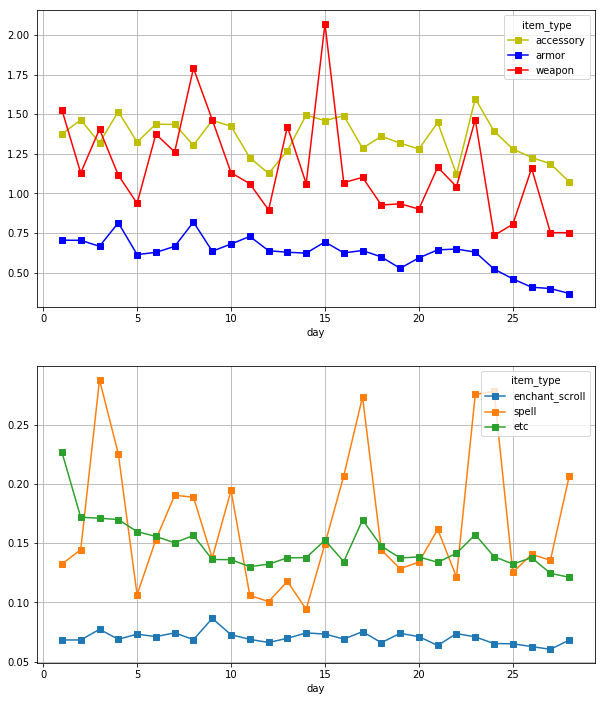

In [27]:
fig = plt.figure(figsize=(10, 12))
# ax = fig.gca()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
table = train_trade1.groupby(['item_type', 'day'])['item_price'].mean().unstack().T
table[['accessory', 'armor', 'weapon']].plot(ax=ax1, grid=True, marker='s', color=['y', 'b', 'r'])
table[['enchant_scroll', 'spell', 'etc']].plot(ax=ax2, grid=True, marker='s')

# 20190815

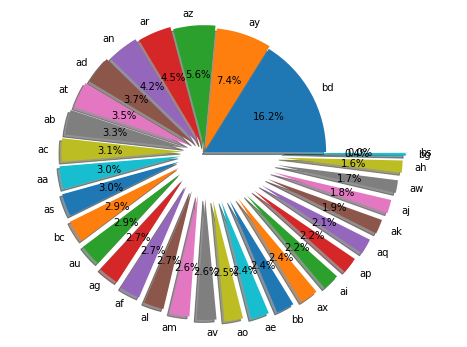

In [60]:
table = train_trade.groupby(['server'])['type'].count().sort_values(ascending=False)
plt.figure(figsize=(8, 6), facecolor='w')
plt.pie(x=table.values,
        labels=table.index,
        autopct='%1.1f%%', shadow=True,
        explode=np.arange(len(table)) / len(table) * .7)
plt.axis('equal')
plt.show()

- Use RNN

In [83]:
t = (set(train_label.acc_id).intersection(set(train_trade.source_acc_id))).union(set(train_label.acc_id).intersection(set(train_trade.target_acc_id)))
print(np.where(train_label.set_index('acc_id').loc[t]['survival_time'] == 64, 1, 0).sum())
print(np.where(train_label.set_index('acc_id').loc[t]['survival_time'] != 64, 1, 0).sum())

20050
13701


In [84]:
t1 = [i for i in train_label.set_index('acc_id').index if i not in t]
print(np.where(train_label.set_index('acc_id').loc[t1]['survival_time'] == 64, 1, 0).sum())
print(np.where(train_label.set_index('acc_id').loc[t1]['survival_time'] != 64, 1, 0).sum())

1946
4303


In [88]:
train_trade1 = train_trade[train_trade['type'] == 0]

In [89]:
t = (set(train_label.acc_id).intersection(set(train_trade1.source_acc_id))).union(set(train_label.acc_id).intersection(set(train_trade1.target_acc_id)))
print(np.where(train_label.set_index('acc_id').loc[t]['survival_time'] == 64, 1, 0).sum())
print(np.where(train_label.set_index('acc_id').loc[t]['survival_time'] != 64, 1, 0).sum())

18076
10887


In [90]:
t1 = [i for i in train_label.set_index('acc_id').index if i not in t]
print(np.where(train_label.set_index('acc_id').loc[t1]['survival_time'] == 64, 1, 0).sum())
print(np.where(train_label.set_index('acc_id').loc[t1]['survival_time'] != 64, 1, 0).sum())

3920
7117


In [91]:
train_trade2 = train_trade[train_trade['type'] != 0]

In [92]:
t = (set(train_label.acc_id).intersection(set(train_trade2.source_acc_id))).union(set(train_label.acc_id).intersection(set(train_trade2.target_acc_id)))
print(np.where(train_label.set_index('acc_id').loc[t]['survival_time'] == 64, 1, 0).sum())
print(np.where(train_label.set_index('acc_id').loc[t]['survival_time'] != 64, 1, 0).sum())

17863
12006


In [94]:
t1 = [i for i in train_label.set_index('acc_id').index if i not in t]
print(np.where(train_label.set_index('acc_id').loc[t1]['survival_time'] == 64, 1, 0).sum())
print(np.where(train_label.set_index('acc_id').loc[t1]['survival_time'] != 64, 1, 0).sum())

4133
5998


In [113]:
train_trade

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price,hour,minute,second
312052,1,00:00:00,0,as,104177,163760,50138,388244,etc,8.868841e-07,2.994625,0,0,0
49265,1,00:00:01,1,ag,22181,330660,97774,378791,adena,1.893617e+00,NaN,0,0,1
97977,1,00:00:01,1,ag,97774,378791,22181,330660,etc,1.143361e-05,NaN,0,0,1
127986,1,00:00:01,1,aq,74334,355483,87174,389623,adena,1.198492e-02,NaN,0,0,1
157271,1,00:00:01,1,ag,97774,378791,22181,330660,accessory,2.396984e-08,NaN,0,0,1
368128,1,00:00:01,0,ad,69422,290193,121023,37066,etc,7.190952e-06,0.947435,0,0,1
65406,1,00:00:03,0,ay,113254,80812,70315,348196,etc,7.190952e-07,0.237123,0,0,3
189132,1,00:00:03,0,ar,89599,361649,70084,310022,etc,7.190952e-08,0.075670,0,0,3
46775,1,00:00:04,0,aa,28030,292301,62232,282678,etc,1.198492e-07,0.014229,0,0,4
66015,1,00:00:05,0,bd,104024,168847,102243,292557,etc,2.396984e-07,0.001085,0,0,5


In [124]:
len(set(train_label.acc_id).intersection(set(train_payment.acc_id)))

23726

,day,source_acc_id,type
0,1,2,6
1,1,18,2
2,1,20,1
3,1,22,2
4,1,28,2
5,1,43,1
6,1,50,5
7,1,53,1
8,1,58,1
9,1,59,1


In [146]:
merge_table = pd.merge(
    pd.merge(train_payment.sort_values('day'), train_label, on='acc_id', how='inner'),
    train_trade.groupby(['day', 'source_acc_id'])['type'].count().reset_index(),
    left_on=['day', 'acc_id'], right_on=['day', 'source_acc_id'], how='inner').groupby('acc_id').agg(
            {'amount_spent_x':np.mean,
             'amount_spent_y':np.mean,
             'type':np.mean})
merge_table.head()

,amount_spent_x,amount_spent_y,type
acc_id,,,
20,0.035204,0.052137,1.0
43,3.696431,0.356197,1.0
53,0.477602,0.017160,1.0
62,2.335206,0.416438,2.0
63,1.056123,0.067853,1.0


In [147]:
merge_table.corr()

,amount_spent_x,amount_spent_y,type
amount_spent_x,1.000000,0.067022,0.028102
amount_spent_y,0.067022,1.000000,0.011861
type,0.028102,0.011861,1.000000


In [201]:
np.where(np.isin(train_trade[['source_acc_id', 'target_acc_id']].values, train_label.acc_id.values).sum(axis=1) < 1)

(array([], dtype=int64),)

In [285]:
train_trade.type.value_counts()

1    1040143
0     809182
Name: type, dtype: int64

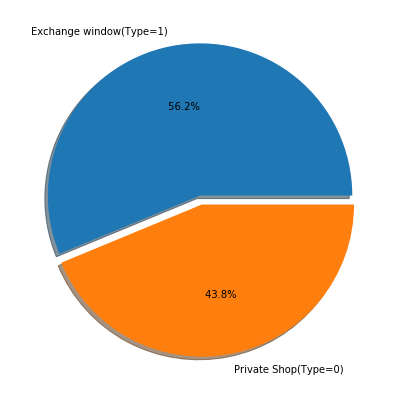

In [288]:
plt.figure(figsize=(10, 7), facecolor='w')
plt.pie(x=train_trade.type.value_counts().values,
        labels=['Exchange window(Type=1)', 'Private Shop(Type=0)'],
        shadow=True, autopct="%5.1f%%", explode=[.03, .03])
plt.show()

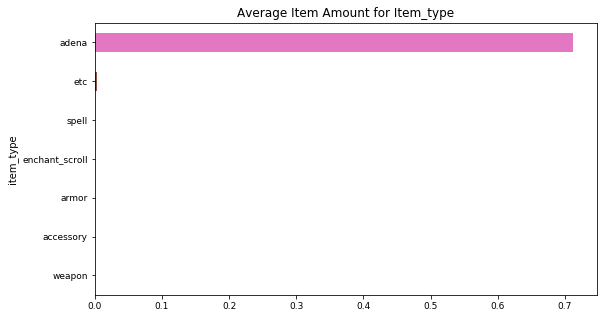

In [272]:
plt.figure(figsize=(9, 5), facecolor='w')
train_trade.groupby('item_type')['item_amount'].mean().sort_values(ascending=True).plot(kind='barh', fontsize=9)
plt.title('Average Item Amount for Item_type', fontsize=12)
plt.show()

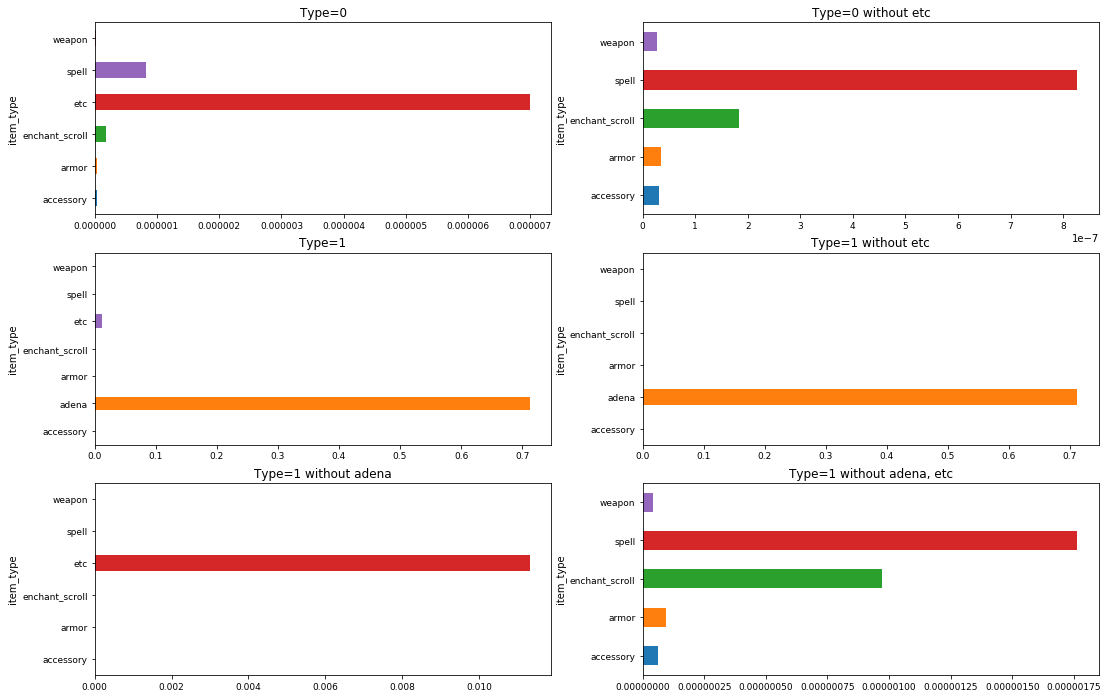

In [257]:
cat = ['accessory', 'armor', 'enchant_scroll', 'etc', 'spell', 'weapon']
fig = plt.figure(figsize=(18, 12), facecolor='w')
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 3)
ax3 = fig.add_subplot(3, 2, 5)
train_trade.groupby(['type', 'item_type'])['item_amount'].mean().loc[0].plot(kind='barh', fontsize=9, ax=ax1)
ax1.set_title('Type=0', fontsize=12)
train_trade.groupby(['type', 'item_type'])['item_amount'].mean().loc[1].plot(kind='barh', fontsize=9, ax=ax2)
ax2.set_title('Type=1', fontsize=12)
train_trade.groupby(['type', 'item_type'])['item_amount'].mean().loc[1].loc[cat].plot(kind='barh', fontsize=9, ax=ax3)
ax3.set_title('Type=1 without adena', fontsize=12)

cat2 = ['accessory', 'armor', 'enchant_scroll', 'spell', 'weapon']
cat3 = ['accessory', 'adena', 'armor', 'enchant_scroll', 'spell', 'weapon']
ax4 = fig.add_subplot(3, 2, 2)
ax5 = fig.add_subplot(3, 2, 4)
ax6 = fig.add_subplot(3, 2, 6)
train_trade.groupby(['type', 'item_type'])['item_amount'].mean().loc[0].loc[cat2].plot(kind='barh', fontsize=9, ax=ax4)
ax4.set_title('Type=0 without etc', fontsize=12)
train_trade.groupby(['type', 'item_type'])['item_amount'].mean().loc[1].loc[cat3].plot(kind='barh', fontsize=9, ax=ax5)
ax5.set_title('Type=1 without etc', fontsize=12)
train_trade.groupby(['type', 'item_type'])['item_amount'].mean().loc[1].loc[cat2].plot(kind='barh', fontsize=9, ax=ax6)
ax6.set_title('Type=1 without adena, etc', fontsize=12)
plt.show()

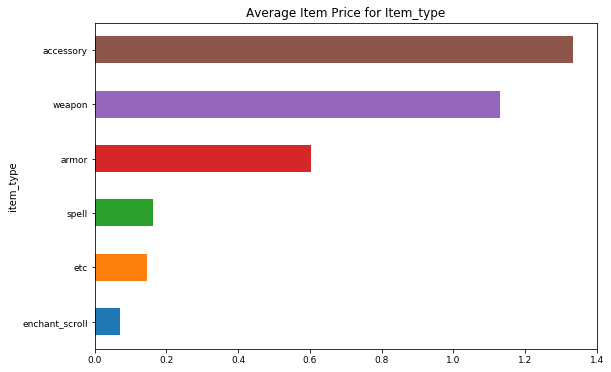

In [267]:
plt.figure(figsize=(9, 6), facecolor='w')
train_trade[train_trade['type']==0].groupby('item_type')['item_price'].mean().sort_values(ascending=True).plot(kind='barh', fontsize=9)
plt.title('Average Item Price for Item_type', fontsize=12)
plt.show()

In [289]:
train_trade

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price,hour,minute,second
312052,1,00:00:00,0,as,104177,163760,50138,388244,etc,8.868841e-07,2.994625,0,0,0
49265,1,00:00:01,1,ag,22181,330660,97774,378791,adena,1.893617e+00,NaN,0,0,1
97977,1,00:00:01,1,ag,97774,378791,22181,330660,etc,1.143361e-05,NaN,0,0,1
127986,1,00:00:01,1,aq,74334,355483,87174,389623,adena,1.198492e-02,NaN,0,0,1
157271,1,00:00:01,1,ag,97774,378791,22181,330660,accessory,2.396984e-08,NaN,0,0,1
368128,1,00:00:01,0,ad,69422,290193,121023,37066,etc,7.190952e-06,0.947435,0,0,1
65406,1,00:00:03,0,ay,113254,80812,70315,348196,etc,7.190952e-07,0.237123,0,0,3
189132,1,00:00:03,0,ar,89599,361649,70084,310022,etc,7.190952e-08,0.075670,0,0,3
46775,1,00:00:04,0,aa,28030,292301,62232,282678,etc,1.198492e-07,0.014229,0,0,4
66015,1,00:00:05,0,bd,104024,168847,102243,292557,etc,2.396984e-07,0.001085,0,0,5
